In [24]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=1.5, style="white", rc={"lines.linewidth": 1.0})

Creation of a pandas dataframe with the results of all our previous experiments

In [73]:
m_ls=[0.1, 0.25, 0.5, 0.75, 0.9]
n_train=[100,200,300,400,500,600,700]
loss_type=['cmll','mll']
dataset=['concrete','naval','protein','winewhite']


columns = ['dataset', 'loss_type', 'n_train', 'RMSE','m']

# Create empty DataFrame
df = pd.DataFrame(columns=columns)
#print(df)

for data in dataset:
    loss='mll'
    fpath = "/Users/Lea/Documents/Documents_2/Documents/MVA/S2/BML/Projet/Bayesian_model_comparison/DKL_experiments/saved-outputs"
    for n in n_train:
        fname = "/exactdkl" + data + "_ntrain" + str(n) + "_" + loss
        fname += ".pt"
        tent=torch.load(fpath+fname)
        tent[0].detach().numpy()
        #print(tent[0].detach().numpy().item())
        #print(tent.size()[0])

        for i in range(tent.size()[0]):
            new_data={'dataset': data, 'loss_type': loss, 'n_train': n, 'RMSE': float(tent[i].detach().numpy().item()), 'm':np.nan}
            #print(new_data)
            new_row = pd.DataFrame([new_data])
            #print(new_row)
            df = pd.concat([df, new_row], ignore_index=True)
    loss='cmll'
    for n in n_train: 
        for m in m_ls:
            fname = "/exactdkl" + data + "_ntrain" + str(n) + "_" + loss
            fname += "_" + str(m) + "m"
            fname += ".pt"
            tent=torch.load(fpath+fname)
            for i in range(tent.size()[0]):
                new_data={'dataset': data, 'loss_type': loss, 'n_train': n, 'RMSE': tent[i].detach().numpy().item(), 'm':m}
                new_row = pd.DataFrame([new_data])
                df = pd.concat([df, new_row], ignore_index=True)
    

print(df)


/var/folders/4l/cx3vxzys6jgblv_bdlfs946c0000gn/T/ipykernel_68820/3183492060.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


        dataset loss_type n_train      RMSE    m
0      concrete       mll     100  0.613413  NaN
1      concrete       mll     100  0.634768  NaN
2      concrete       mll     100  0.564692  NaN
3      concrete       mll     100  0.725267  NaN
4      concrete       mll     100  0.648908  NaN
...         ...       ...     ...       ...  ...
1675  winewhite      cmll     700  0.812981  0.9
1676  winewhite      cmll     700  0.782534  0.9
1677  winewhite      cmll     700  0.786738  0.9
1678  winewhite      cmll     700  0.813834  0.9
1679  winewhite      cmll     700  0.808480  0.9

[1680 rows x 5 columns]
Values taken in the 'm' column and their types:
Value: 100, Type: int
Value: 200, Type: int
Value: 300, Type: int
Value: 400, Type: int
Value: 500, Type: int
Value: 600, Type: int
Value: 700, Type: int


In [100]:
#Create a Box Plot for the RMSE values
def PlotAx(ax, dset, m=0.9):
    sub_df = df[df['dataset']==dset]
    #print(sub_df)
    #print('m')
    #print(sub_df[sub_df['m'].isin])
    #filtered_sub_df = sub_df[sub_df['m'].isin([float(0.9), float('NaN')])]
    #print(filtered_sub_df)
    box = sns.boxplot(x='n_train', y='RMSE', hue='loss_type', data=sub_df[sub_df['m'].isin([float('NaN'), m])],
               ax=ax, showfliers = False)
    for patch in box.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .75))
    sns.despine()
    ax.set_title(dset.capitalize(), fontsize=fs-2)
    if dset == 'winewhite':
        ax.set_title("Wine, White", fontsize=fs-2)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend(loc='upper right', fontsize=fs-2)
    #ax.legend([],[], frameon=False)
    return box

<Axes.ArtistList of 0 artists>


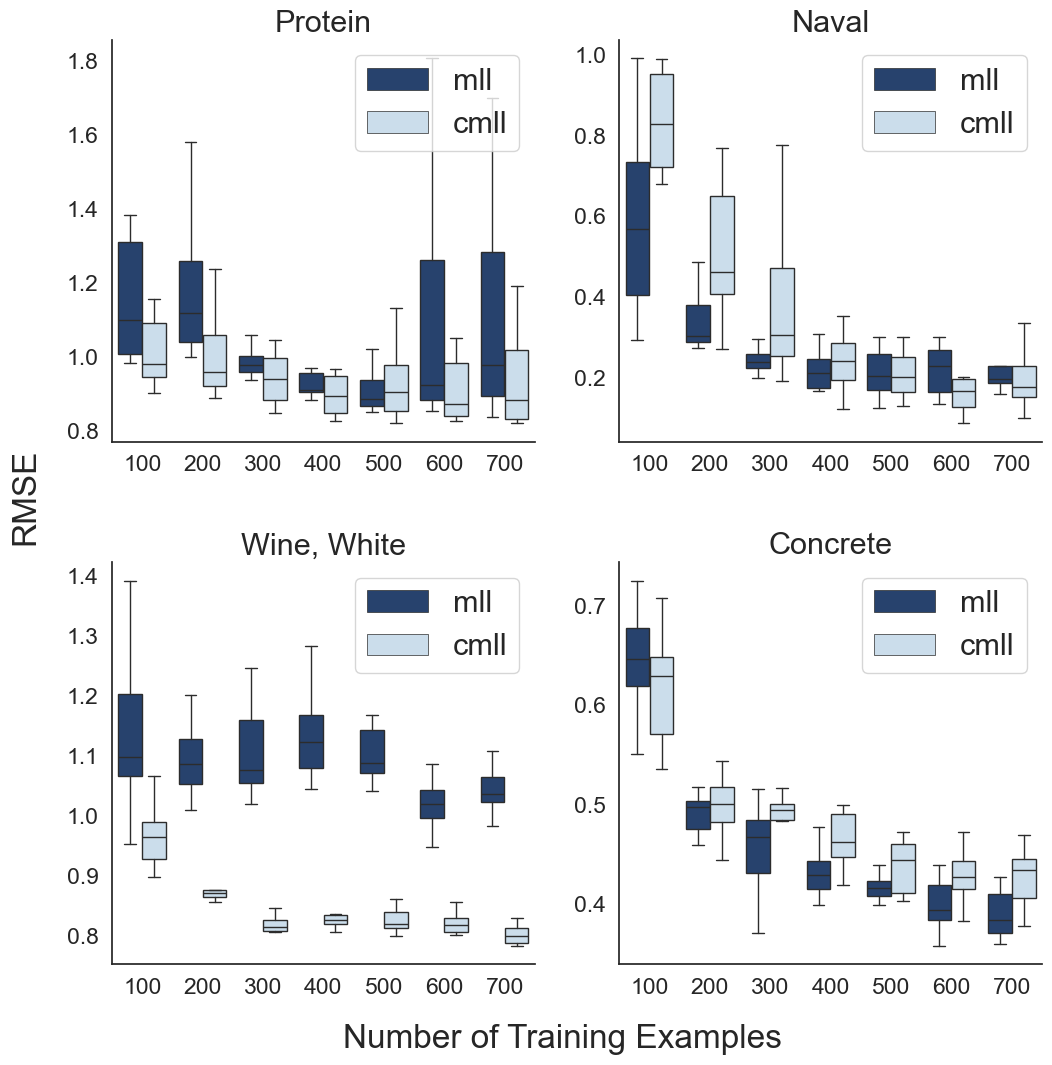

In [103]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)


fs = 24

PlotAx(ax[0,0], 'protein')
PlotAx(ax[0,1], 'naval')
PlotAx(ax[1,0], 'winewhite')
box = PlotAx(ax[1,1], 'concrete')
print(box.artists)

fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs);
# plt.savefig("./exactdkl.pdf", bbox_inches='tight')

<Axes.ArtistList of 0 artists>


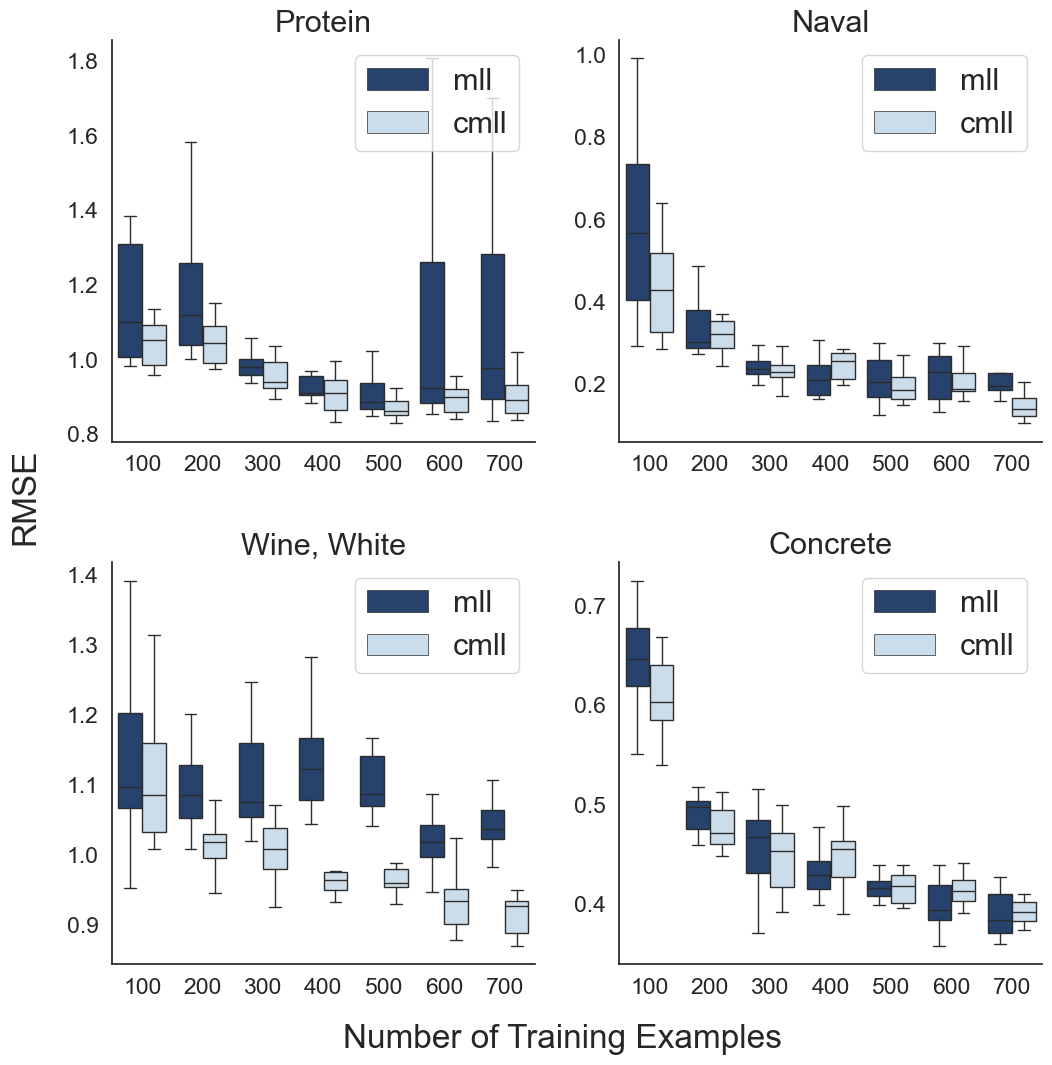

In [104]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)


fs = 24

PlotAx(ax[0,0], 'protein', m=0.5)
PlotAx(ax[0,1], 'naval',m=0.5)
PlotAx(ax[1,0], 'winewhite',m=0.5)
box = PlotAx(ax[1,1], 'concrete',m=0.5)
print(box.artists)

#plt.legend([box.artists[0], box.artists[1]], ['mll', "cmll"],
#          fontsize=fs-2, bbox_to_anchor=(0.95, 3.55))
fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs);

In [105]:
#plot to compare the RMSE when we use different cut-off numbers, here .5 and .9
def PlotAx2(ax, dset, m_ls=[ 0.5, 0.9]):
    sub_df = df[df['dataset'] == dset]
    box = sns.boxplot(x='n_train', y='RMSE', hue='m', data=sub_df[sub_df['m'].isin(m_ls)],
                      ax=ax, showfliers=False, palette='Set1')  # Adjust palette as needed
    for patch in box.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .75))
    sns.despine()
    ax.set_title(dset.capitalize(), fontsize=fs-2)
    if dset == 'winewhite':
        ax.set_title("Wine, White", fontsize=fs-2)
    ax.set_xlabel("Number of Training Examples")
    ax.set_ylabel("RMSE")
    ax.legend(loc='upper right', fontsize=fs-2)  # Adjust legend position and font size
    return box

<Axes.ArtistList of 0 artists>


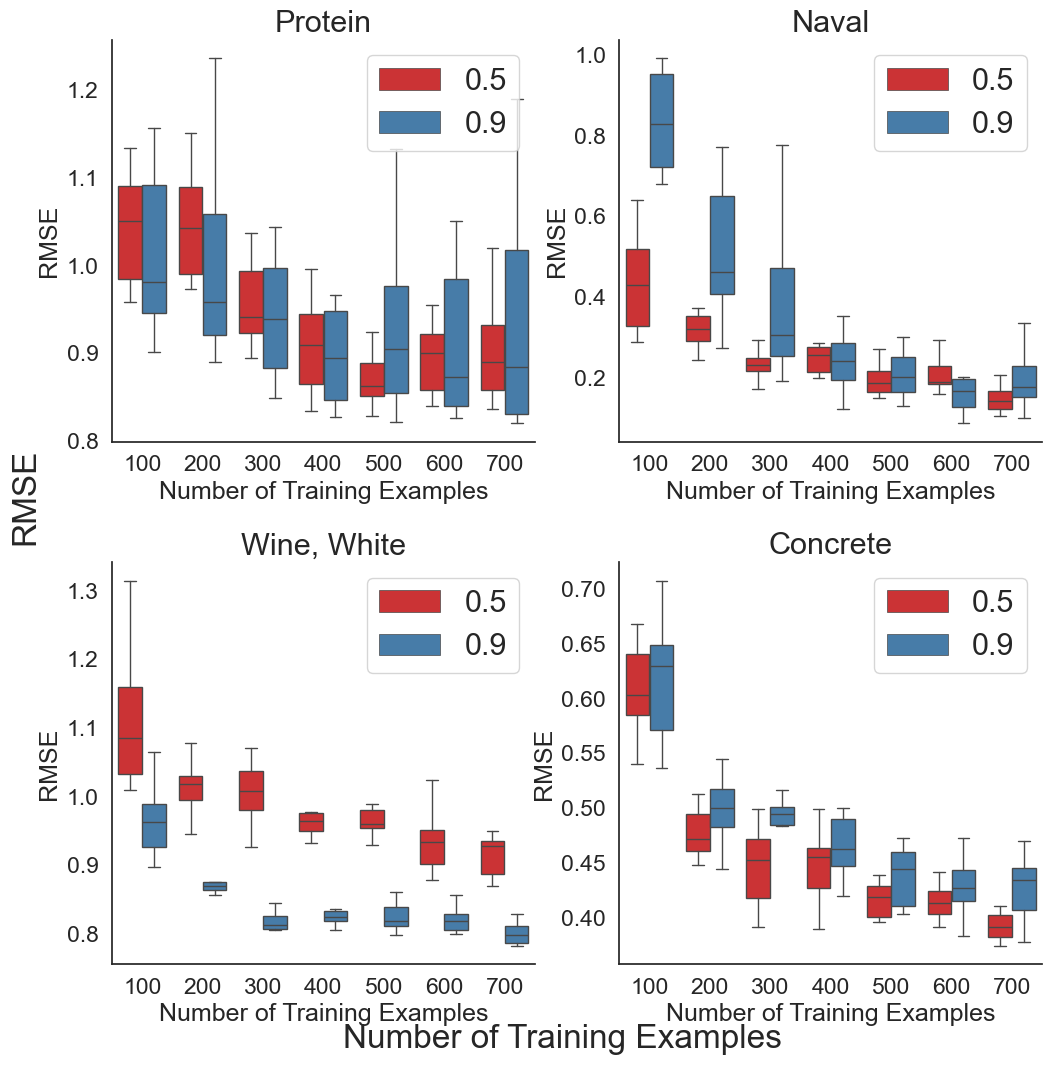

In [107]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)


fs = 24

PlotAx2(ax[0,0], 'protein')
PlotAx2(ax[0,1], 'naval')
PlotAx2(ax[1,0], 'winewhite')
box = PlotAx2(ax[1,1], 'concrete')
print(box.artists)


fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs);
# plt.savefig("./exactdkl.pdf", bbox_inches='tight')